# CAR PRICE PREDICTION:

### NAME: RUTUJA RAJENDRA PATIL

### FROM: SAVITRIBAI  PHULE PUNE UNIVERSITY.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [26]:
Ndf=pd.read_csv("C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Car details v3.csv")

In [27]:
# checking for null value in set.
print(Ndf.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


## cleaning the Data

In [28]:
for col in Ndf:
    if(col!='ts'):
        z=Ndf[col].unique()
        print(col,":",z)
        print("\n")

name : ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


year : [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]


selling_price : [  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000  2500000   484999
   315000   475000   2

In [29]:
List=Ndf.columns
for col in List:
    if(col=='mileage'):
        Ndf[col]=Ndf[col].str.replace('kmpl','')
        Ndf[col]=Ndf[col].str.replace('km/kg','')
    elif(col=='engine'):
        Ndf[col]=Ndf[col].str.replace('CC','')
    elif(col=='max_power'):
        Ndf[col]=Ndf[col].str.replace('bhp','')

In [30]:
Cdf=Ndf.drop(Ndf.columns[Ndf.isnull().mean()>0.5],axis=1)

In [31]:
raw=Cdf.drop(Cdf.columns[Cdf.isnull().mean()>0.5])

In [32]:
df=raw.fillna(method='ffill')
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0


In [33]:
df.isnull().sum() # NULL values are removed....

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          8128 non-null object
engine           8128 non-null object
max_power        8128 non-null object
torque           8128 non-null object
seats            8128 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 889.0+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder() # this creates instance for encoder.
df.fuel=LE.fit_transform(df.fuel)
df.seller_type=LE.fit_transform(df.seller_type)
df.transmission=LE.fit_transform(df.transmission)
df.owner=LE.fit_transform(df.owner)


In [36]:
# drop the column torque
df.drop(['torque'],axis=1,inplace=True)
df.drop(['max_power'],axis=1,inplace=True)
df.drop(['name'],axis=1,inplace=True)

In [37]:
#converting value of year into the number of years from 2022 ie age of car model
temp=df['year']
temp2=[]
for i in range(len(temp)):
    temp2.append(2022-temp[i])
df['year']=temp2

In [38]:
df['year']

0        8
1        8
2       16
3       12
4       15
        ..
8123     9
8124    15
8125    13
8126     9
8127     9
Name: year, Length: 8128, dtype: int64

In [39]:
for col in df:
    if(col!='ts'):
        z=df[col].unique()
        print(col,":",z)
        print("\n")

year : [ 8 16 12 15  5 21 11  9 17 13  6 10 20  7  4 19  3 14  2 23 22 39 18 26
 28 27 24 25 31]


selling_price : [  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000  2500000   484999
   315000   475000   290000   455000   351000   535000   175000   565000
   120000   725000   185000   615000   270000   625000   866000   375000
   522000   451999   780000   595000  1140000   360000   105000   135000
   690000  3975000  5150000  3200000  4100000  4500000  6000000  3790000
  2150000

### labeled as
fuel : ['Diesel' 'Petrol' 'LPG' 'CNG'] = [1 3 2 0]


seller_type : ['Individual' 'Dealer' 'Trustmark Dealer'] = [1 0 2]


transmission : ['Manual' 'Automatic'] = [1 0]


owner : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] = [0 2 4 1 3]

In [40]:
df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,8,450000,145500,1,1,1,0,23.4,1248,5.0
1,8,370000,120000,1,1,1,2,21.14,1498,5.0
2,16,158000,140000,3,1,1,4,17.7,1497,5.0
3,12,225000,127000,1,1,1,0,23.0,1396,5.0
4,15,130000,120000,3,1,1,0,16.1,1298,5.0
5,5,440000,45000,3,1,1,0,20.14,1197,5.0
6,15,96000,175000,2,1,1,0,17.3,1061,5.0
7,21,45000,5000,3,1,1,2,16.1,796,4.0
8,11,350000,90000,1,1,1,0,23.59,1364,5.0
9,9,200000,169000,1,1,1,0,20.0,1399,5.0


In [41]:
df.tail(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
8118,9,380000,25000,3,1,1,0,18.5,1197,5.0
8119,5,360000,80000,3,1,1,0,20.51,998,5.0
8120,14,120000,191000,3,1,1,0,17.92,1086,5.0
8121,9,260000,50000,3,1,1,2,18.9,998,5.0
8122,8,475000,80000,1,1,1,2,22.54,1396,5.0
8123,9,320000,110000,3,1,1,0,18.5,1197,5.0
8124,15,135000,119000,1,1,1,1,16.8,1493,5.0
8125,13,382000,120000,1,1,1,0,19.3,1248,5.0
8126,9,290000,25000,1,1,1,0,23.57,1396,5.0
8127,9,290000,25000,1,1,1,0,23.57,1396,5.0


# converting values of mileage and engine from string format to float

In [42]:
def ConvStringToFloat(Y):
    L1=df[Y]
    L2=[]
    for i in range(0,len(L1)):
        L1[i]=float(L1[i]) 
        L2.append(L1[i])
    df[Y]=L2

In [43]:
ConvStringToFloat('mileage')
ConvStringToFloat('engine')

In [44]:
df.shape

(8128, 10)

In [45]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,8.195989,6.382718e+05,6.981951e+04,1.891117,0.890502,0.870817,0.814345,19.404732,1458.028666,5.418184
std,4.044249,8.062534e+05,5.655055e+04,1.002313,0.394459,0.335423,1.221644,4.048404,504.405870,0.961137
min,2.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,2.000000
25%,5.000000,2.549990e+05,3.500000e+04,1.000000,1.000000,1.000000,0.000000,16.780000,1197.000000,5.000000
50%,7.000000,4.500000e+05,6.000000e+04,1.000000,1.000000,1.000000,0.000000,19.300000,1248.000000,5.000000
75%,11.000000,6.750000e+05,9.800000e+04,3.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,5.000000
max,39.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,14.000000


<BarContainer object of 10 artists>

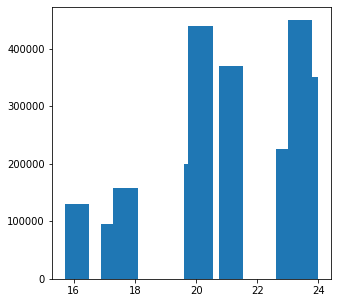

In [47]:
plt.figure(figsize=(5,5))
plt.bar('mileage','selling_price',data=df.head(10))

<BarContainer object of 10 artists>

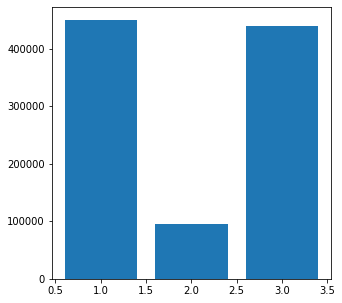

In [49]:
plt.figure(figsize=(5,5))
plt.bar('fuel','selling_price',data=df.head(10))

<BarContainer object of 10 artists>

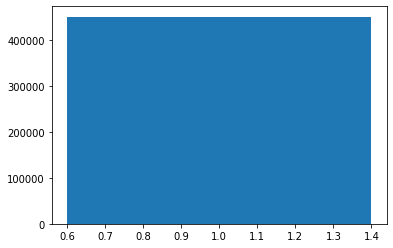

In [51]:
plt.bar('seller_type','selling_price',data=df.head(10))

<BarContainer object of 10 artists>

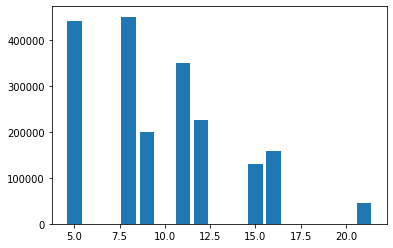

In [52]:
plt.bar('year','selling_price',data=df.head(10))

In [53]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit(df)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,8,450000,145500,1,1,1,0,23.40,1248.0,5.0
1,8,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,16,158000,140000,3,1,1,4,17.70,1497.0,5.0
3,12,225000,127000,1,1,1,0,23.00,1396.0,5.0
4,15,130000,120000,3,1,1,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,9,320000,110000,3,1,1,0,18.50,1197.0,5.0
8124,15,135000,119000,1,1,1,1,16.80,1493.0,5.0
8125,13,382000,120000,1,1,1,0,19.30,1248.0,5.0
8126,9,290000,25000,1,1,1,0,23.57,1396.0,5.0


In [54]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
year,1.000000,-0.414092,0.418006,0.050312,0.146042,0.244707,0.477249,-0.316702,-0.018750,0.011612
selling_price,-0.414092,1.000000,-0.225534,-0.194029,-0.335857,-0.588845,-0.229174,-0.120378,0.448392,0.039188
km_driven,0.418006,-0.225534,1.000000,-0.265877,0.122105,0.201229,0.280340,-0.172860,0.201544,0.220865
fuel,0.050312,-0.194029,-0.265877,1.000000,0.110512,-0.035255,-0.022339,-0.082568,-0.473692,-0.333354
seller_type,0.146042,-0.335857,0.122105,0.110512,1.000000,0.227871,0.143443,-0.022575,-0.089346,0.051988
transmission,0.244707,-0.588845,0.201229,-0.035255,0.227871,1.000000,0.147458,0.173937,-0.278795,0.073317
owner,0.477249,-0.229174,0.280340,-0.022339,0.143443,0.147458,1.000000,-0.158738,0.008687,0.028718
mileage,-0.316702,-0.120378,-0.172860,-0.082568,-0.022575,0.173937,-0.158738,1.000000,-0.575201,-0.448634
engine,-0.018750,0.448392,0.201544,-0.473692,-0.089346,-0.278795,0.008687,-0.575201,1.000000,0.609631
seats,0.011612,0.039188,0.220865,-0.333354,0.051988,0.073317,0.028718,-0.448634,0.609631,1.000000


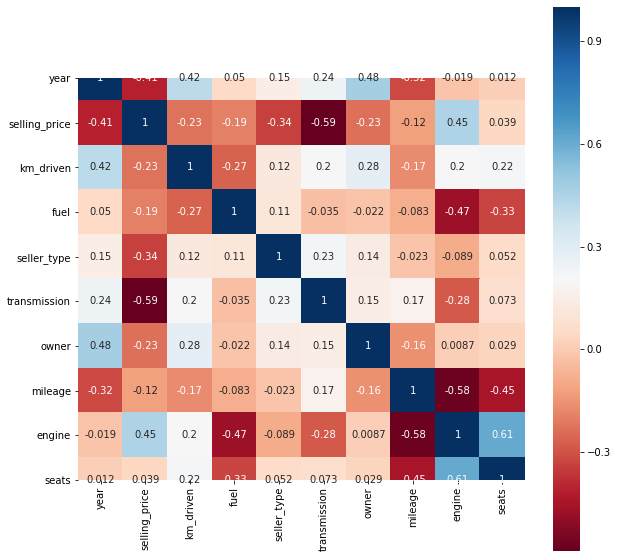

In [55]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True, cmap="RdBu")#RdBu

In [56]:
# target variable Y
Y='selling_price'

In [57]:
"""from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline
ohe=OneHotEncoder()
ohe.fit(df[['name']])
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((OneHotEncoder(),['name']))"""

"from sklearn.preprocessing import OneHotEncoder\n\nfrom sklearn.pipeline import make_pipeline\nohe=OneHotEncoder()\nohe.fit(df[['name']])\nfrom sklearn.compose import make_column_transformer\ncolumn_trans=make_column_transformer((OneHotEncoder(),['name']))"

In [58]:
x=df.drop([Y], axis=1, inplace=False)
y=np.array(df[Y])

In [59]:
#scaling the data
from sklearn.preprocessing import StandardScaler
xs = x.copy()
num_cols=xs.columns
for i in num_cols:
    scale = StandardScaler().fit(xs[[i]])
    xs[i] = scale.transform(xs[[i]])
x=xs

In [60]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=21)

# Linear regression

In [61]:
LR=LinearRegression().fit(X_train,y_train)
y_Train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)
modelfinal=LR    
errorstr = mean_squared_error(y_train,y_Train_pred)
errorste = mean_squared_error(y_test,y_test_pred )
print('\033[1m')
print("\n",'\033[95m'," Accuracy results for Linear regressor :",Y,"*********",'\033[0m')
print('\033[0m')
print('\nrmse(On train,On test)=',(errorstr*0.5,errorste*0.5))
errorstr = mean_absolute_error(y_train,y_Train_pred)
errorste = mean_absolute_error(y_test, y_test_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))
    
r2tr = r2_score(y_train,y_Train_pred)
r2te = r2_score(y_test, y_test_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))  



   Accuracy results for Linear regressor : selling_price ********* 


rmse(On train,On test)= (141368991417.20084, 116383977870.1461)

mae(On train,On test)= (302784.2273683939, 290673.8412176178)

R2(On train,On test)= (0.583332984605202, 0.5644824620394913)


# Decision Tree

In [62]:
DTmodel=DecisionTreeRegressor().fit(X_train,y_train)
y_Train_pred=DTmodel.predict(X_train)
y_test_pred=DTmodel.predict(X_test)
modelfinal=DTmodel    
errorstr = mean_squared_error(y_train,y_Train_pred)
errorste = mean_squared_error(y_test,y_test_pred )
print('\033[1m')
print("\n",'\033[93m',"Accuracy results for Decision tree regressor :",Y,"*********",'\033[0m')
print('\033[0m')
print('\nrmse(On train,On test)=',(errorstr*0.5,errorste*0.5))
errorstr = mean_absolute_error(y_train,y_Train_pred)
errorste = mean_absolute_error(y_test, y_test_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))
    
r2tr = r2_score(y_train,y_Train_pred)
r2te = r2_score(y_test, y_test_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))   




  Accuracy results for Decision tree regressor : selling_price ********* 


rmse(On train,On test)= (121868448.09783518, 18068007432.67575)

mae(On train,On test)= (3669.253647004079, 88268.2062044659)

R2(On train,On test)= (0.9996408083411314, 0.9323881666795168)


# random Forest

In [63]:
RFmodel=RandomForestRegressor(n_estimators = 'warn',max_features="auto",bootstrap="True").fit(X_train,y_train)  
RandomForestRegressor()
y_Train_pred=RFmodel.predict(X_train)
y_test_pred=RFmodel.predict(X_test)
modelfinal=RFmodel    
errorstr = mean_squared_error(y_train,y_Train_pred)
errorste = mean_squared_error(y_test,y_test_pred )
print('\033[1m')
print("\n",'\033[92m',"Accuracy results for Random forest regressor :",Y,"*********",'\033[0m')
print('\033[0m')
print('\nrmse(On train,On test)=',(errorstr*0.5,errorste*0.5))
errorstr = mean_absolute_error(y_train,y_Train_pred)
errorste = mean_absolute_error(y_test, y_test_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))
    
r2tr = r2_score(y_train,y_Train_pred)
r2te = r2_score(y_test, y_test_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))     



  Accuracy results for Random forest regressor : selling_price ********* 


rmse(On train,On test)= (3862129625.6814556, 12390196996.258932)

mae(On train,On test)= (33171.18923908907, 77295.1836755764)

R2(On train,On test)= (0.9886168670507702, 0.9536349574107438)


## regressor funcion using random forest

In [64]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'seats'],
      dtype='object')

In [65]:
def regressor(x):
    x = scale.transform([x])
    print(x)
    prediction =modelfinal.predict(x)
    print('\npredicted value:',prediction[0])

In [66]:
inp=[8,14550,1,1,1,0,23.4,1248,5.0]  
regressor(inp)

[[ 2.68637590e+00  1.51336172e+04 -4.59711437e+00 -4.59711437e+00
  -4.59711437e+00 -5.63761298e+00  1.87100545e+01  1.29290465e+03
  -4.35119928e-01]]

predicted value: 1151500.0


In [67]:
# above code predicted accurate value.........

# KNN regressor:

In [68]:
KNNmodel=KNeighborsRegressor(6)
KNNmodel.fit(X_train,y_train)
#y_pred=clf.predict(X_test)
#print('errorstr=',mean_squared_error(y_test,y_pred))

y_Train_pred=KNNmodel.predict(X_train)
y_test_pred=KNNmodel.predict(X_test)
Kmodelfinal=KNNmodel    
errorstr = mean_squared_error(y_train,y_Train_pred)
errorste = mean_squared_error(y_test,y_test_pred )
print('\033[1m')
print("\n",'\033[94m',"3. Accuracy results for KNN regressor :",Y,"*********",'\033[0m')
print('\033[0m')
print('\nrmse(On train,On test)=',(errorstr*0.5,errorste*0.5))
errorstr = mean_absolute_error(y_train,y_Train_pred)
errorste = mean_absolute_error(y_test, y_test_pred)
print('\nmae(On train,On test)=',(errorstr,errorste))
    
r2tr = r2_score(y_train,y_Train_pred)
r2te = r2_score(y_test, y_test_pred)
print('\nR2(On train,On test)=',(r2tr,r2te))
def KNNregressor(x):
    x = scale.transform([x])
    print(x)
    prediction =Kmodelfinal.predict(x)
    print('\npredicted value:',prediction[0])



  3. Accuracy results for KNN regressor : selling_price ********* 


rmse(On train,On test)= (23701761231.667107, 23644313943.05456)

mae(On train,On test)= (92144.19706756894, 108139.34583845838)

R2(On train,On test)= (0.9301420911828246, 0.911521211220897)


In [69]:
t=[8,145500,1,1,1,0,23.4,1248,5.0] #real: 400000
KNNregressor(t)

[[ 2.68637590e+00  1.51386910e+05 -4.59711437e+00 -4.59711437e+00
  -4.59711437e+00 -5.63761298e+00  1.87100545e+01  1.29290465e+03
  -4.35119928e-01]]

predicted value: 532333.3333333334


In [70]:
import pickle
with open("model_pickle",'wb') as f:
    pickle.dump(Kmodelfinal,f)

In [71]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)   

In [73]:
x = scale.transform([t])
mp.predict(x)

array([532333.33333333])